<a href="https://colab.research.google.com/github/Firizki17/Pengolahan-Citra-Digital/blob/main/Frequency_domain_filter_Laplacian_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Muh Firizki (Universitas MDP)

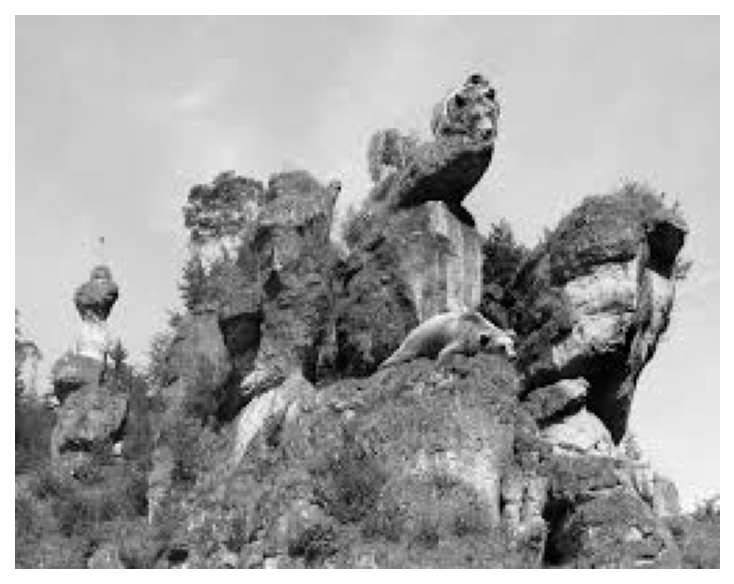

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests

# Fetch the image from the URL
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQy7tILm84mxQLPOz_O4LiJxcYUTh-_-xW_aQ&s.png'
response = requests.get(url)
image_array = np.asarray(bytearray(response.content), dtype=np.uint8)

# Decode the image array
f = cv2.imdecode(image_array, cv2.IMREAD_GRAYSCALE)

# Normalize the image
f = f / 255

# Display the image
plt.figure(dpi=150)
plt.imshow(f, cmap='gray')
plt.axis('off')
plt.show()


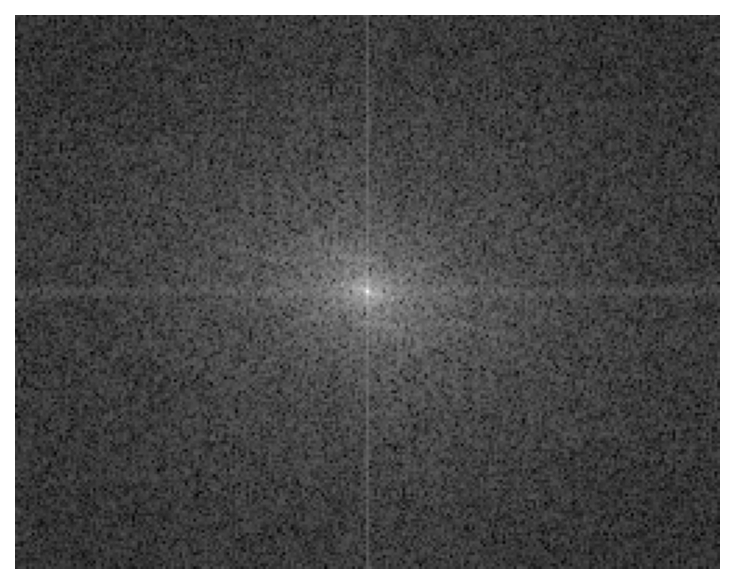

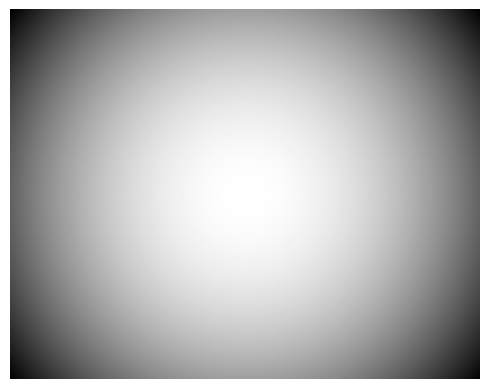

In [2]:
# transform into frequency domain
F = np.fft.fftshift(np.fft.fft2(f))

plt.figure(dpi=150)
plt.imshow(np.log1p(np.abs(F)), cmap='gray')
plt.axis('off')
plt.show()

# Laplacian Filter
P,Q = F.shape
H = np.zeros((P,Q), dtype=np.float32)
for u in range(P):
    for v in range(Q):
        H[u,v] = -4*np.pi*np.pi*((u-P/2)**2 + (v-Q/2)**2)

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

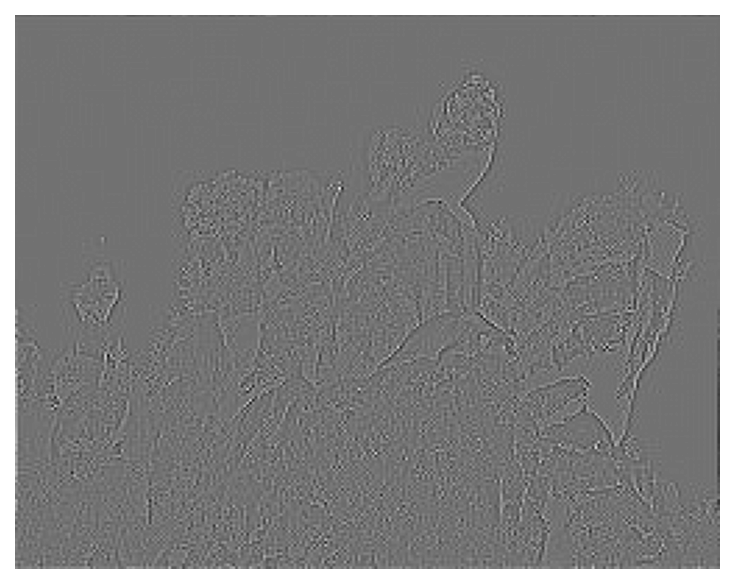

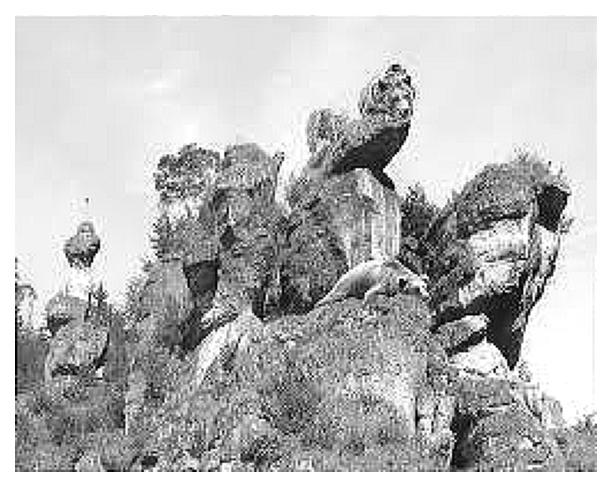

In [3]:
# Laplacian image
Lap = H * F
Lap = np.fft.ifftshift(Lap)
Lap = np.real(np.fft.ifft2(Lap))

# convert the Laplacian Image value into range [-1,1]
OldRange = np.max(Lap) - np.min(Lap)
NewRange = 1 - -1
LapScaled = (((Lap - np.min(Lap)) * NewRange) / OldRange) + -1

plt.figure(dpi=150)
plt.imshow(LapScaled, cmap='gray')
plt.axis('off')
plt.show()

# image ehancement
c = -1
g = f + c*LapScaled
g = np.clip(g, 0, 1)

plt.figure(figsize=(5,7),dpi=150)
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()